# sentinelRequest

sentinelRequest can be used to colocate a geodataframe (ie areas, trajectories, buoys, etc ...) with sentinel (1, but also 2 , 3 : all known by scihub)

## Install



```
% conda install  lxml numpy geopandas shapely requests fiona
% pip install git+https://gitlab.ifremer.fr/sarwing/sentinelrequest.git
```



## CLI usage

In [1]:
!sentinelRequest --help

usage: sentinelRequest [-h] [--user USER] [--password PASSWORD] [--date DATE]
                       [--wkt WKT] [--filename FILENAME] [--query QUERY]
                       [--datatake DATATAKE] [--dateformat DATEFORMAT]
                       [--dtime DTIME] [--cachedir CACHEDIR]
                       [--cacherefreshrecent CACHEREFRESHRECENT] [--cols COLS]
                       [--infile INFILE] [--infile_format INFILE_FORMAT]
                       [--outfile OUTFILE] [--outfile_format OUTFILE_FORMAT]
                       [--show] [-v]

Requests SAFE list from scihub

optional arguments:
  -h, --help            show this help message and exit
  --user USER           scihub login
  --password PASSWORD   scihub password
  --date DATE           date as string (see --dateformat, or date -d). if
                        provided 2 time, first is start, last is stop
  --wkt WKT             wkt representation of the region of interest
  --filename FILENAME   filename, with joker. ex 'S1

### "One shot" from command line:

`
% sentinelRequest --user=xxxx --password=xxxxx --date='2018-09-23 00:00' --date='2018-09-23 12:00' --filename='S1?_?W_GRD*.SAFE' --cachedir=/home1/scratch/oarcher/scihub_cache/ --wkt='POLYGON ((-10 75, -10 86, 12 86, 12 84, -10 75))'
`

```
INFO:sentinelRequest:from 2018-09-23 00:00:00 to 2018-09-23 12:00:00 : 11 SAFES
INFO:sentinelRequest:Total : 11 SAFES
filename
S1B_EW_GRDM_1SDH_20180923T071854_20180923T071954_012839_017B47_17F2.SAFE
S1B_EW_GRDM_1SDH_20180923T071954_20180923T072054_012839_017B47_1E6F.SAFE
S1B_EW_GRDM_1SDH_20180923T072054_20180923T072154_012839_017B47_CD41.SAFE
S1B_EW_GRDM_1SDH_20180923T072154_20180923T072254_012839_017B47_3682.SAFE
S1A_EW_GRDM_1SDH_20180923T081003_20180923T081107_023823_02997B_049A.SAFE
S1A_EW_GRDM_1SDH_20180923T081107_20180923T081207_023823_02997B_6EA6.SAFE
S1B_EW_GRDM_1SDH_20180923T085656_20180923T085756_012840_017B4E_B07B.SAFE
S1B_EW_GRDM_1SDH_20180923T085756_20180923T085856_012840_017B4E_6CAD.SAFE
S1B_EW_GRDM_1SDH_20180923T085856_20180923T085956_012840_017B4E_1CCD.SAFE
S1B_EW_GRDM_1SDH_20180923T103504_20180923T103604_012841_017B54_DBBC.SAFE
S1B_EW_GRDM_1SDH_20180923T103604_20180923T103704_012841_017B54_B267.SAFE
```

### From csv file

`
% cat test.csv
`
```
index;startdate;stopdate;geometry
area1;2018-10-02 00:00;2018-10-02 21:00;POLYGON ((-12 35, -5 35, -5 45, -12 45, -12 35))
area2;2018-10-13 06:00;2018-10-13 21:00;POLYGON ((-10 32, -3 32, -3 42, -10 42, -10 32))
area3;2018-10-13 00:00;2018-10-13 18:00;POLYGON ((12 35, 5 35, 5 45, 12 45, 12 35))
```

`
% sentinelRequest --user=xxxx --password=xxxx --infile=test.csv --filename='S1?_?W_GRD*.SAFE' --cachedir=/home1/scratch/oarcher/scihub_cache/ --cols=index,filename
`

```
INFO:sentinelRequest:req 1/2 from 2018-10-02 00:00:00 to 2018-10-02 21:00:00 : 9/21 SAFES
INFO:sentinelRequest:req 2/2 from 2018-10-13 00:00:00 to 2018-10-13 21:00:00 : 30/35 SAFES
INFO:sentinelRequest:Total : 39 SAFES
index;filename
area1;S1A_IW_GRDH_1SDV_20181002T061827_20181002T061852_023953_029DA0_C61E.SAFE
area1;S1B_IW_GRDH_1SDV_20181002T181105_20181002T181130_012977_017F7D_FE88.SAFE
area1;S1B_IW_GRDH_1SDV_20181002T181130_20181002T181155_012977_017F7D_93FF.SAFE
area1;S1B_IW_GRDH_1SDV_20181002T181155_20181002T181222_012977_017F7D_CD9A.SAFE
area3;S1A_IW_GRDH_1SDV_20181013T053545_20181013T053610_024113_02A2DB_D121.SAFE
area3;S1A_IW_GRDH_1SDV_20181013T053815_20181013T053840_024113_02A2DB_7D53.SAFE
area2;S1B_IW_GRDTH_1SDV_20181013T062502_20181013T062527_013130_018428_1E77.SAFE
area2;S1B_IW_GRDH_1SDV_20181013T062527_20181013T062552_013130_018428_82AB.SAFE
area2;S1B_IW_GRDH_1SDV_20181013T062642_20181013T062707_013130_018428_AB0E.SAFE
area2;S1B_IW_GRDH_1SDV_20181013T062707_20181013T062732_013130_018428_8210.SAFE
```

If `--date` is specified 2 times with `--infile`, it will superseeds ones founds in infile :

`
sentinelRequest --user oarcher --password nliqt6u3 --infile=test.csv --date=last-monday-7days --date=now --filename='S1?_?W_GRD*.SAFE' --cachedir=/home1/scratch/oarcher/scihub_cache/ --cols=index,filename
`



## API usage

In [2]:
%matplotlib inline
import geopandas as gpd
from sentinelRequest import scihubQuery
import datetime
import matplotlib.pyplot as plt
import shapely.wkt as wkt

# get your own credential from  https://scihub.copernicus.eu/dhus
import pickle
user,password = pickle.load(open("credential.pkl","rb"))

In [3]:
help(scihubQuery)

Help on function scihubQuery in module sentinelRequest:

scihubQuery(gdf=None, startdate=None, stopdate=None, date=None, dtime=None, timedelta_slice=datetime.timedelta(days=7), filename='S1*', datatake=0, duplicate=False, query=None, user='guest', password='guest', min_sea_percent=None, fig=None, cachedir=None, cacherefreshrecent=datetime.timedelta(days=7))
    input:
        gdf : 
            None or geodataframe with geometry and date. gdf usually contain almost these cols:
            index         : an index for the row (for ex area name, buoy id, etc ...)
            beginposition : datetime object (startdate)
            endposition   : datetime object (stopdate)
            geometry      : shapely object
        date: 
            column name if gdf, or datetime object
        dtime : 
            if date is not None, dtime as timedelta object will be used to compute startdate and stopdate 
        startdate : 
            None or column  name in gdf , or datetime object . not 

### Example 1 

As an example, tree areas are defined:
* Ireland, that space overlap with Gascogne, but not overlap it in time.
* Gascogne and Portugal, that overlap in time and space

In [4]:
gdf = gpd.GeoDataFrame({
        "beginposition" : [ datetime.datetime(2018,10,2,0), datetime.datetime(2018,10,13,6) ,  datetime.datetime(2018,10,13,0) ],
        "endposition"   : [ datetime.datetime(2018,10,2,21) , datetime.datetime(2018,10,13,21) ,datetime.datetime(2018,10,13,18) ],
        "geometry"      : [ wkt.loads("POINT (-7 53)").buffer(4), wkt.loads("POINT (-5 45)").buffer(5),  wkt.loads("POLYGON ((-12 35, -5 35, -5 45, -12 45, -12 35))")]    
    },index=["Irland","Gascogne","Portugal"])
gdf

,beginposition,endposition,geometry
Irland,2018-10-02 00:00:00,2018-10-02 21:00:00,"POLYGON ((-3.00000 53.00000, -3.01926 52.60793..."
Gascogne,2018-10-13 06:00:00,2018-10-13 21:00:00,"POLYGON ((0.00000 45.00000, -0.02408 44.50991,..."
Portugal,2018-10-13 00:00:00,2018-10-13 18:00:00,"POLYGON ((-12.00000 35.00000, -5.00000 35.0000..."


INFO:sentinelRequest:Req 01/02 : 009/015 SAFES -> 0009 colocs. Times : req 0.1s, coloc 0.0s
INFO:sentinelRequest:Req 02/02 : 010/024 SAFES -> 0012 colocs. Times : req 0.1s, coloc 0.0s
INFO:sentinelRequest:Total : 21 SAFES (19 uniques)


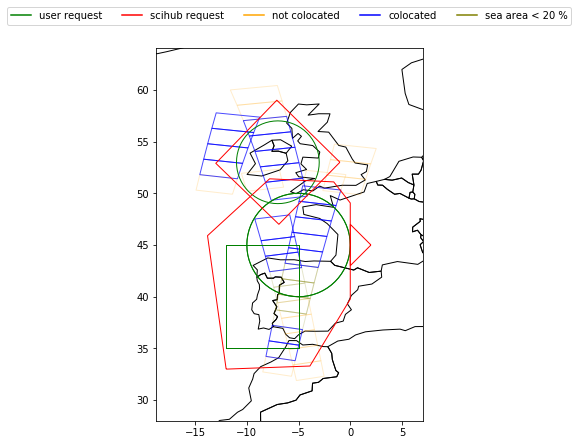

In [5]:
fig = plt.figure(figsize=(10,7))
safes = scihubQuery(
        gdf=gdf,
        min_sea_percent=20, 
        user=user,
        password=password,
        filename='S1?_?W_GRD*.SAFE',
        cachedir='/home1/scratch/oarcher/scihub_cache',
        fig=fig)


User requested area are in green. They can be more complex shape than allowed by scihub, because shapes are simplified for the request (in red ). Once the request is done, a colocation is done with the originals shapes, to drop extraneaous safes (in yellow).

Gascogne and Portugal areas are merged into a simplier big shape, because they are adjacent in time and space. Ireland is adjacent in space, but not in time (see example 2 for more infos).

Green safes are safes over land (min_sea_percent).


The result is a geodataframe with most information from scihub. Only colocated (ie blue) are returned:

In [6]:
safes.iloc[0]

acquisitiontype                                                      NOMINAL
beginposition                                     2018-10-02 07:02:07.487000
endposition                                       2018-10-02 07:02:32.486000
filename                   S1B_IW_GRDH_1SDV_20181002T070207_20181002T0702...
footprint                  POLYGON ((-9.331628 55.874199, -13.383495 56.2...
format                                                                  SAFE
gmlfootprint               <gml:Polygon srsName="http://www.opengis.net/g...
identifier                 S1B_IW_GRDH_1SDV_20181002T070207_20181002T0702...
ingestiondate                                     2018-10-02 11:01:50.187000
instrumentname                             Synthetic Aperture Radar (C-band)
instrumentshortname                                                SAR-C SAR
lastorbitnumber                                                        12970
lastrelativeorbitnumber                                                  169

Most fields are converted from str to python type (geometry, datetime, int ...)

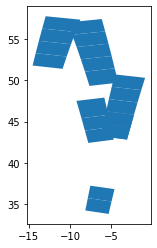

In [7]:
safes['footprint'].plot()

In [8]:
print('safe was ingested %s after aquisition' % (safes.iloc[0]['ingestiondate']-safes.iloc[0]['endposition']))

safe was ingested 0 days 03:59:17.701000 after aquisition


Index from original request are preserved, so it's easy to know the area that belong to a safe. (See end of example 2 for advanced index handling).

In [9]:
safes.loc['Portugal']

,acquisitiontype,beginposition,endposition,filename,footprint,format,gmlfootprint,identifier,ingestiondate,instrumentname,...,relativeorbitnumber,sensoroperationalmode,size,slicenumber,status,swathidentifier,url,url_alternative,url_icon,uuid
Portugal,NOMINAL,2018-10-13 06:24:12.316,2018-10-13 06:24:37.314,S1B_IW_GRDH_1SDV_20181013T062412_20181013T0624...,"POLYGON ((-2.67424 44.32666, -5.96670 44.73592...",SAFE,"<gml:Polygon srsName=""http://www.opengis.net/g...",S1B_IW_GRDH_1SDV_20181013T062412_20181013T0624...,2018-10-13 10:00:43.891,Synthetic Aperture Radar (C-band),...,154,IW,1.65 GB,19,ARCHIVED,IW,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,6244c5a5-cf83-4f27-90c4-e9b2e17c39dd
Portugal,NOMINAL,2018-10-13 06:24:37.315,2018-10-13 06:25:02.315,S1B_IW_GRDH_1SDV_20181013T062437_20181013T0625...,"POLYGON ((-3.10039 42.82986, -6.30884 43.23866...",SAFE,"<gml:Polygon srsName=""http://www.opengis.net/g...",S1B_IW_GRDH_1SDV_20181013T062437_20181013T0625...,2018-10-13 10:02:56.026,Synthetic Aperture Radar (C-band),...,154,IW,1.65 GB,20,ARCHIVED,IW,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,ea30fb07-13c8-49eb-b4c3-9f490b92fdef
Portugal,NOMINAL,2018-10-13 06:26:42.317,2018-10-13 06:27:07.315,S1B_IW_GRDH_1SDV_20181013T062642_20181013T0627...,"POLYGON ((-4.97677 35.31735, -7.85286 35.73253...",SAFE,"<gml:Polygon srsName=""http://www.opengis.net/g...",S1B_IW_GRDH_1SDV_20181013T062642_20181013T0627...,2018-10-13 10:01:06.798,Synthetic Aperture Radar (C-band),...,154,IW,1.65 GB,25,ARCHIVED,IW,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,e4d9132d-8c1c-455a-ac23-51a4a86feb98
Portugal,NOMINAL,2018-10-13 06:27:07.316,2018-10-13 06:27:32.314,S1B_IW_GRDH_1SDV_20181013T062707_20181013T0627...,"POLYGON ((-5.32803 33.81222, -8.15118 34.22947...",SAFE,"<gml:Polygon srsName=""http://www.opengis.net/g...",S1B_IW_GRDH_1SDV_20181013T062707_20181013T0627...,2018-10-13 10:00:43.992,Synthetic Aperture Radar (C-band),...,154,IW,1.65 GB,26,ARCHIVED,IW,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,f88bb340-28ab-4c7a-a806-bd797ea83145


Some safes are in both area (Portugal and Gascogne), because they overlap in space and time.

In [10]:
safes[safes.duplicated(['filename'],keep=False)][['filename']]

,filename
Gascogne,S1B_IW_GRDH_1SDV_20181013T062412_20181013T0624...
Portugal,S1B_IW_GRDH_1SDV_20181013T062412_20181013T0624...
Gascogne,S1B_IW_GRDH_1SDV_20181013T062437_20181013T0625...
Portugal,S1B_IW_GRDH_1SDV_20181013T062437_20181013T0625...


### Example 2
Cyclone track colocalization

In [11]:
import pandas as pd
#ibtracs=gpd.read_file('tmp/IBTrACS.NA.list.v04r00.points.shp')
#gdf_track=ibtracs[ibtracs['SID'] == '2019235N10324']
#gdf_track=gdf_track[['ISO_TIME','USA_WIND','geometry']]
#gdf_track['ISO_TIME']=pd.to_datetime(gdf_track['ISO_TIME'],format="%Y-%m-%d %H:%M:%S")
#gdf_track.reset_index(inplace = True,drop=True) 
#gdf_track.to_file("track.gpkg", driver="GPKG")

gdf_track = gpd.read_file('track.gpkg')
gdf_track['ISO_TIME']=pd.to_datetime(gdf_track['ISO_TIME'],format="%Y-%m-%d %H:%M:%S")
gdf_track

,ISO_TIME,USA_WIND,geometry
0,2019-08-22 12:00:00,15.0,POINT (-35.90000 9.50000)
1,2019-08-22 15:00:00,15.0,POINT (-36.56000 9.50000)
2,2019-08-22 18:00:00,15.0,POINT (-37.30000 9.50000)
3,2019-08-22 21:00:00,17.0,POINT (-38.15000 9.49000)
4,2019-08-23 00:00:00,20.0,POINT (-39.00000 9.50000)
...,...,...,...
136,2019-09-08 12:00:00,70.0,POINT (-60.40000 49.40000)
137,2019-09-08 15:00:00,65.0,POINT (-59.46000 50.10000)
138,2019-09-08 18:00:00,60.0,POINT (-58.30000 50.67000)
139,2019-09-08 21:00:00,55.0,POINT (-56.87000 51.16000)


INFO:sentinelRequest:Req 01/03 : 007/039 SAFES -> 0007 colocs. Times : req 0.1s, coloc 0.8s
INFO:sentinelRequest:Req 02/03 : 004/052 SAFES -> 0004 colocs. Times : req 0.1s, coloc 1.0s
INFO:sentinelRequest:Req 03/03 : 003/061 SAFES -> 0003 colocs. Times : req 0.1s, coloc 0.5s
INFO:sentinelRequest:Total : 14 SAFES (14 uniques)


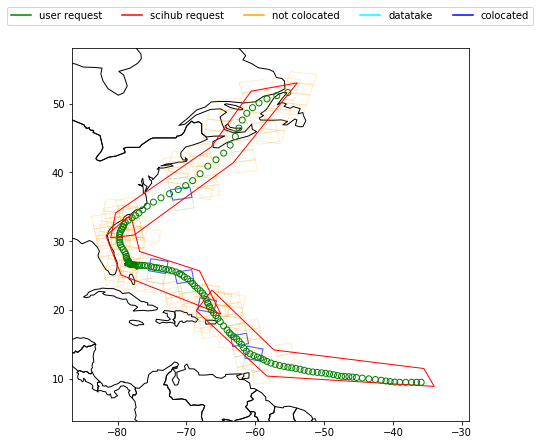

In [12]:
fig = plt.figure(figsize=(10,7))
safes = scihubQuery(
        gdf=gdf_track,
        date='ISO_TIME', # no startdate/stopdate, but a date ans a dtime
        dtime=datetime.timedelta(hours=1.5),
        user=user,
        password=password,
        datatake=1,   # take adjacents safes, up to one.
        filename='S1?_?W_GRD*.SAFE',
        cachedir='/home1/scratch/oarcher/scihub_cache',
        fig=fig)

#### datatake

Here, `datatake=1` is specified to retrieve adjacents safes from colocated ones (in cyan). When specified, the result contain a `datatake_index` column. 0 means the colocated one, and other values are the range of the adjacent safe (up to -n..n with `datatake=n`)

Positive `datatake_index` are for safes *after* the colocated one, and negative index are fo safes *before* the colocated one.

In [13]:
safes[['filename','datatake_index']]

,filename,datatake_index
39,S1A_IW_GRDH_1SDV_20190827T095110_20190827T0951...,0
39,S1A_IW_GRDH_1SDV_20190827T095139_20190827T0952...,1
43,S1A_IW_GRDH_1SDV_20190827T221901_20190827T2219...,-1
43,S1A_IW_GRDH_1SDV_20190827T221926_20190827T2219...,0
43,S1A_IW_GRDH_1SDV_20190827T221951_20190827T2220...,1
55,S1B_IW_GRDH_1SDV_20190829T102127_20190829T1021...,0
55,S1B_IW_GRDH_1SDV_20190829T102156_20190829T1022...,1
68,S1A_IW_GRDH_1SDV_20190830T224613_20190830T2246...,-1
68,S1A_IW_GRDH_1SDV_20190830T224638_20190830T2247...,0
72,S1A_IW_GRDH_1SDV_20190831T105329_20190831T1053...,0


#### Time slicing with timedelta_slice

One can see on previous figure that 3 requests are done (ie 3 red area). gdf rows are grouped to reduce the amount of scihub requests with the `timedelta_slice` parameter (default to `datetime.timedelta(weeks=1)` )

If we reduce `timedelta_slice`, we can see that more scihub request are done, with less uncolocated safes (ie yellow). (be warned with a big `timedelta_slice` : this can produce scihub timeouts).

(with `timedelta_slice=None`, this feature is *disabled* : a scihub request is done for *every* geometry).

INFO:sentinelRequest:Req 01/18 : 000/000 SAFES -> 0000 colocs. Times : req 0.0s, coloc 0.1s
INFO:sentinelRequest:Req 02/18 : 000/000 SAFES -> 0000 colocs. Times : req 0.0s, coloc 0.1s
INFO:sentinelRequest:Req 03/18 : 000/000 SAFES -> 0000 colocs. Times : req 0.0s, coloc 0.1s
INFO:sentinelRequest:Req 04/18 : 000/000 SAFES -> 0000 colocs. Times : req 0.0s, coloc 0.1s
INFO:sentinelRequest:Req 05/18 : 002/002 SAFES -> 0002 colocs. Times : req 0.1s, coloc 0.2s
INFO:sentinelRequest:Req 06/18 : 003/006 SAFES -> 0003 colocs. Times : req 0.1s, coloc 0.2s
INFO:sentinelRequest:Req 07/18 : 002/004 SAFES -> 0002 colocs. Times : req 0.1s, coloc 0.2s
INFO:sentinelRequest:Req 08/18 : 000/008 SAFES -> 0000 colocs. Times : req 0.1s, coloc 0.1s
INFO:sentinelRequest:Req 09/18 : 002/003 SAFES -> 0002 colocs. Times : req 0.0s, coloc 0.2s
INFO:sentinelRequest:Req 10/18 : 002/002 SAFES -> 0002 colocs. Times : req 0.0s, coloc 0.2s
INFO:sentinelRequest:Req 11/18 : 000/000 SAFES -> 0000 colocs. Times : req 0.0s,

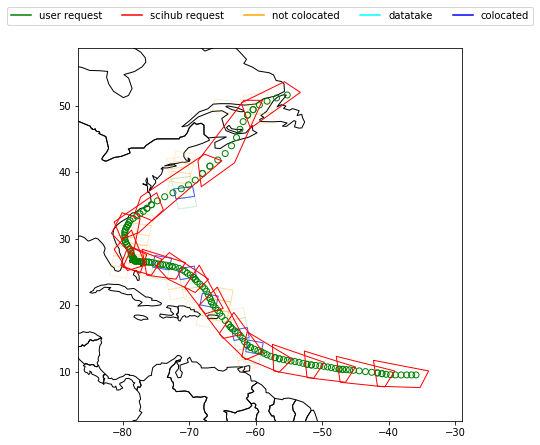

In [14]:
# same request as above, but with reduced timedelta_slice
fig = plt.figure(figsize=(10,7))
safes = scihubQuery(
        gdf=gdf_track,
        date='ISO_TIME',
        dtime=datetime.timedelta(hours=1.5),
        user=user,
        password=password,
        timedelta_slice=datetime.timedelta(days=1),
        datatake=1,
        filename='S1?_?W_GRD*.SAFE',
        cachedir='/home1/scratch/oarcher/scihub_cache',
        fig=fig)

#### Merging source and result with shared index

As seen before, the result (safes) share the same index as the source. So we can merge the two geodataframe, to associate a wind speed from the cyclone track with the safe, and compute distance from the eye to the safe.

In [15]:
# here, we merge the result with the source request, to associate wind speed to each safe.
merged=safes[['filename','datatake_index','footprint']].merge(
    gdf_track[['USA_WIND','geometry']],left_index=True,right_index=True)
merged['eye_dist'] = merged.set_geometry('geometry').distance(merged.set_geometry('footprint').exterior)
# negative dist if safe contains eye
merged['eye_dist']=merged['eye_dist']*(((~merged.set_geometry('footprint').contains(merged.set_geometry('geometry'))+1)*2)-3)
merged[['filename','datatake_index','USA_WIND','eye_dist']]


,filename,datatake_index,USA_WIND,eye_dist
39,S1A_IW_GRDH_1SDV_20190827T095110_20190827T0951...,0,45.0,-0.612785
39,S1A_IW_GRDH_1SDV_20190827T095139_20190827T0952...,1,45.0,0.761460
43,S1A_IW_GRDH_1SDV_20190827T221901_20190827T2219...,-1,47.0,0.557410
43,S1A_IW_GRDH_1SDV_20190827T221926_20190827T2219...,0,47.0,-0.557319
43,S1A_IW_GRDH_1SDV_20190827T221951_20190827T2220...,1,47.0,0.982714
55,S1B_IW_GRDH_1SDV_20190829T102127_20190829T1021...,0,75.0,-0.747642
55,S1B_IW_GRDH_1SDV_20190829T102156_20190829T1022...,1,75.0,0.747733
68,S1A_IW_GRDH_1SDV_20190830T224613_20190830T2246...,-1,115.0,1.389122
68,S1A_IW_GRDH_1SDV_20190830T224638_20190830T2247...,0,115.0,-0.271777
72,S1A_IW_GRDH_1SDV_20190831T105329_20190831T1053...,0,125.0,-0.086589


## Annexes

### Antimeridian handling: small geometry vs large one


Given 2 points on the earth, there is two possible paths: one short, and one long that wrap around the earth.

By default, geometry are the smallest ones. To preserve a large geometry,  GeometryCollection must be used.


INFO:sentinelRequest:Req 01/05 : 034/052 SAFES -> 0037 colocs. Times : req 0.1s, coloc 0.0s
INFO:sentinelRequest:Req 02/05 : 033/049 SAFES -> 0034 colocs. Times : req 0.1s, coloc 0.0s
INFO:sentinelRequest:Req 03/05 : 030/049 SAFES -> 0032 colocs. Times : req 0.1s, coloc 0.0s
INFO:sentinelRequest:Req 04/05 : 036/058 SAFES -> 0037 colocs. Times : req 0.1s, coloc 0.0s
INFO:sentinelRequest:Req 05/05 : 013/017 SAFES -> 0015 colocs. Times : req 0.1s, coloc 0.0s
INFO:sentinelRequest:Total : 155 SAFES (146 uniques)


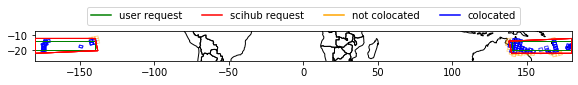

INFO:sentinelRequest:Req 01/05 : 177/291 SAFES -> 0177 colocs. Times : req 0.5s, coloc 0.0s
INFO:sentinelRequest:Req 02/05 : 181/311 SAFES -> 0181 colocs. Times : req 0.6s, coloc 0.0s
INFO:sentinelRequest:Req 03/05 : 197/326 SAFES -> 0197 colocs. Times : req 0.6s, coloc 0.0s
INFO:sentinelRequest:Req 04/05 : 183/316 SAFES -> 0183 colocs. Times : req 0.7s, coloc 0.0s
INFO:sentinelRequest:Req 05/05 : 068/110 SAFES -> 0068 colocs. Times : req 0.2s, coloc 0.0s
INFO:sentinelRequest:Total : 806 SAFES (806 uniques)


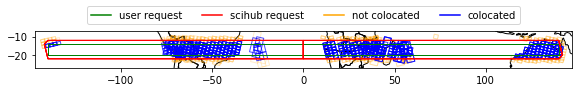

,beginposition,endposition,geometry
0,2018-10-01,2018-10-31,GEOMETRYCOLLECTION (POLYGON ((-140.00000 -14.0...


In [16]:
from shapely.geometry import GeometryCollection

# the polygon is more than 180 deg wide : it will be wrapped, and will cross antimeridian
large_poly = wkt.loads("POLYGON ((-140 -14, 140 -14, 140 -20, -140 -20, -140 -14))")

gdf = gpd.GeoDataFrame({
        "beginposition" : [ datetime.datetime(2018,10,1)],
        "endposition"   : [ datetime.datetime(2018,10,31) ],
        "geometry"      : [ large_poly ]    
    },index=[0])

fig = plt.figure(figsize=(10,7))
safes = scihubQuery(
        gdf=gdf,
        user=user,
        password=password,
        filename='S1?_?W_GRD*.SAFE',
        cachedir='/home1/scratch/oarcher/scihub_cache',
        fig=fig)
plt.show()

# same polygon, but encapsulated in a GeometryCollection : it will not be wrapped
gdf = gpd.GeoDataFrame({
        "beginposition" : [ datetime.datetime(2018,10,1)],
        "endposition"   : [ datetime.datetime(2018,10,31) ],
        "geometry"      : [ GeometryCollection([large_poly]) ]    
    },index=[0])

fig = plt.figure(figsize=(10,7))
safes = scihubQuery(
        gdf=gdf,
        user=user,
        password=password,
        filename='S1?_?W_GRD*.SAFE',
        cachedir='/home1/scratch/oarcher/scihub_cache',
        fig=fig)
plt.show()

gdf